https://medium.com/mlearning-ai/k-means-clustering-with-scikit-learn-e2af706450e4 --> A different way to do elbow curve   

https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py --> different method to do mini batch kmeans 

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_plusplus.html --> try this??

https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

https://towardsdev.com/outlier-detection-using-k-means-clustering-in-python-214188fc90e8

https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3

things to do:
1. kmeans++ jasmin
2. exploring the random state it kind of helps?? not so sure actually i haven try big numbers samiksha
4. things to put it report the three methods clodia 

we all try find public code?

comparsion metric:
1. timing???
2. how well it cluster???



stuff to discuss:
1. are we using three variables??
2. scaling affects!!!!!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import time
from mpl_toolkits import mplot3d 
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler()

In [2]:
imported_data = pd.read_csv("../miami_housing.csv") #import fresh data  
imported_data[["LATITUDE", "LONGITUDE"]] = scaler.fit_transform(imported_data[["LATITUDE", "LONGITUDE"]])
imported_data

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,0.845660,0.903382,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,0.846203,0.918989,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,0.846222,0.919529,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,0.847019,0.922091,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,0.847130,0.917398,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,0.645862,0.668466,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,0.646704,0.667142,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,0.647090,0.677152,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,0.647485,0.673799,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


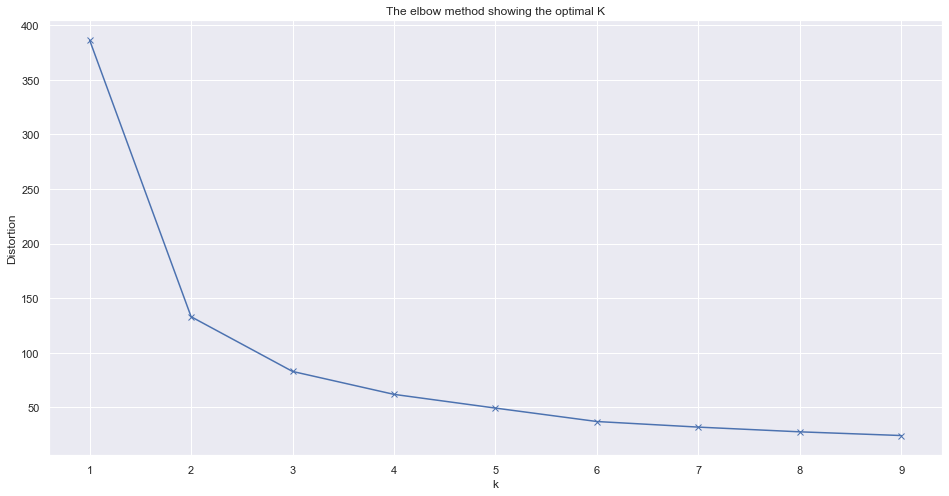

In [3]:
miamiData = pd.read_csv("../miami_housing.csv")
data = pd.DataFrame(miamiData[['LATITUDE', 'LONGITUDE']])
distortions = [] # It is calculated as the average of the squared distances from the cluster centers of the respective clusters
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_) # Inertia is the sum of squared distances of samples to their closest cluster center.
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

In [89]:

def three_Feature_clustering(varname):
   
    dataset = pd.read_csv("../miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    k_means = KMeans(n_clusters=6, init='random', random_state=42) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    centroid = k_means.cluster_centers_
    end = time.time()
    print("Time Taken for kmeans: ", end-start)
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
#     plt.figure(figsize=(16, 6))
#     print(centroid)
    
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
#     sb.scatterplot(data = centroid, x=centroid[:, 1], y=centroid[:,0], color = "black")
#     plt.figure(figsize=(8,5))
#     sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
#     string = "Price based on cluster with variable " +str(varname)
#     plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent')


Time Taken for kmeans:  0.42937707901000977


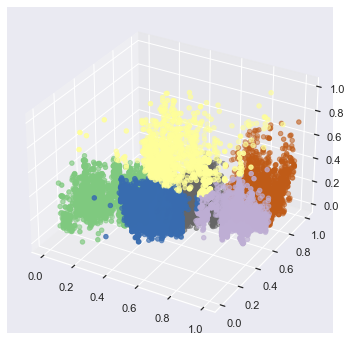

In [90]:
three_Feature_clustering("TOT_LVG_AREA")

In [91]:
def three_Feature_clustering_kmeanspp(varname):
    
    dataset = pd.read_csv("../miami_housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    k_means = KMeans(n_clusters=6, init='k-means++', random_state=42) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    print("Time Taken for kmeans++: ", end-start)
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
#     plt.figure(figsize=(16, 6))
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
#     plt.figure(figsize=(8,5))
#     sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
#     string = "Price based on cluster with variable " +str(varname)
#     plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent')

Time Taken for kmeans:  0.34028124809265137
Time Taken for kmeans++:  0.470487117767334


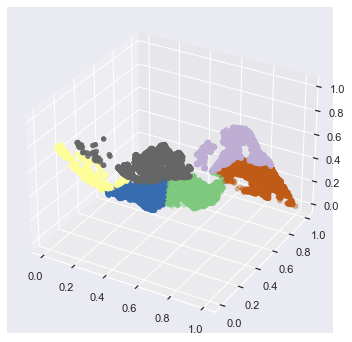

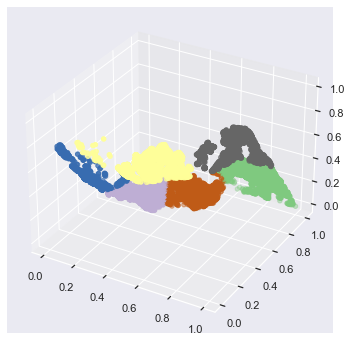

In [92]:
three_Feature_clustering("OCEAN_DIST")
three_Feature_clustering_kmeanspp("OCEAN_DIST")